In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

FILE_PATH = "Ecommerce_Consumer_Behavior_Analysis_Data.csv"

## About Dataset
Source: https://www.kaggle.com/datasets/salahuddinahmedshuvo/ecommerce-consumer-behavior-analysis-data/data

This dataset provides a comprehensive collection of consumer behavior data that can be used for various market research and statistical analyses. It includes information on purchasing patterns, demographics, product preferences, customer satisfaction, and more, making it ideal for market segmentation, predictive modeling, and understanding customer decision-making processes.

The dataset is designed to help researchers, data scientists, and marketers gain insights into consumer purchasing behavior across a wide range of categories. By analyzing this dataset, users can identify key trends, segment customers, and make data-driven decisions to improve product offerings, marketing strategies, and customer engagement.

### Key Features:
- **Customer Demographics:** Understand age, income, gender, and education level for better segmentation and targeted marketing.
- **Purchase Behavior:** Includes purchase amount, frequency, category, and channel preferences to assess spending patterns.
- **Customer Loyalty:** Features like brand loyalty, engagement with ads, and loyalty program membership provide insights into long-term customer retention.
- **Product Feedback:** Customer ratings and satisfaction levels allow for analysis of product quality and customer sentiment.
- **Decision-Making:** Time spent on product research, time to decision, and purchase intent reflect how customers make purchasing decisions.
- **Influences on Purchase:** Factors such as social media influence, discount sensitivity, and return rates are included to analyze how external factors affect purchasing behavior.

### Columns Overview:
0. **Customer_ID:** Unique identifier for each customer.
1. **Age:** Customer's age (integer).
2. **Gender:** Customer's gender (categorical: Male, Female, Non-binary, Other).
3. **Income_Level:** Customer's income level (categorical: Low, Middle, High).
4. **Marital_Status:** Customer's marital status (categorical: Single, Married, Divorced, Widowed).
5. **Education_Level:** Highest level of education completed (categorical: High School, Bachelor's, Master's, Doctorate).
6. **Occupation:** Customer's occupation (categorical: Various job titles).
7. **Location:** Customer's location (city, region, or country).
8. **Purchase_Category:** Category of purchased products (e.g., Electronics, Clothing, Groceries).
9. **Purchase_Amount:** Amount spent during the purchase (decimal).
10. **Frequency_of_Purchase:** Number of purchases made per month (integer).
11. **Purchase_Channel:** The purchase method (categorical: Online, In-Store, Mixed).
12. **Brand_Loyalty:** Loyalty to brands (1-5 scale).
13. **Product_Rating:** Rating given by the customer to a purchased product (1-5 scale).
14. **Time_Spent_on_Product_Research:** Time spent researching a product (integer, hours or minutes).
15. **Social_Media_Influence:** Influence of social media on purchasing decision (categorical: High, Medium, Low, None).
16. **Discount_Sensitivity:** Sensitivity to discounts (categorical: Very Sensitive, Somewhat Sensitive, Not Sensitive).
17. **Return_Rate:** Percentage of products returned (decimal).
18. **Customer_Satisfaction:** Overall satisfaction with the purchase (1-10 scale).
19. **Engagement_with_Ads:** Engagement level with advertisements (categorical: High, Medium, Low, None).
20. **Device_Used_for_Shopping:** Device used for shopping (categorical: Smartphone, Desktop, Tablet).
21. **Payment_Method:** Method of payment used for the purchase (categorical: Credit Card, Debit Card, PayPal, Cash, Other).
22. **Time_of_Purchase:** Timestamp of when the purchase was made (date/time).
23. **Discount_Used:** Whether the customer used a discount (Boolean: True/False).
24. **Customer_Loyalty_Program_Member:** Whether the customer is part of a loyalty program (Boolean: True/False).
25. **Purchase_Intent:** The intent behind the purchase (categorical: Impulsive, Planned, Need-based, Wants-based).
26. **Shipping_Preference:** Shipping preference (categorical: Standard, Express, No Preference).
27. **Payment_Frequency:** Frequency of payment (categorical: One-time, Subscription, Installments).
28. **Time_to_Decision:** Time taken from consideration to actual purchase (in days).


## Data Extraction

In [2]:
og_df = pd.read_csv(FILE_PATH)

In [3]:
# Display the first 3 and last 3 rows of the DataFrame
display(og_df.head(3))
display(og_df.tail(3))

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,$333.80,...,7,NaN,Tablet,Credit Card,3/1/2024,True,False,Need-based,No Preference,2
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,$222.22,...,5,High,Tablet,PayPal,4/16/2024,True,False,Wants-based,Standard,6
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,$426.22,...,7,Low,Smartphone,Debit Card,3/15/2024,True,True,Impulsive,No Preference,3


,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
997,77-241-7621,26,Male,High,Married,Bachelor's,High,Warudoyong,Food & Beverages,$453.37,...,6,High,Desktop,Credit Card,3/11/2024,True,True,Wants-based,Express,9
998,53-091-2176,21,Female,High,Widowed,Bachelor's,Middle,Béziers,Baby Products,$106.15,...,5,Medium,Desktop,Cash,3/30/2024,True,True,Impulsive,Standard,8
999,48-203-9118,21,Female,Middle,Single,High School,High,Dongzhou,Health Care,$378.47,...,10,Low,Tablet,Other,12/8/2024,False,False,Planned,Express,2


In [4]:
# A summary of the dataset
print("Shape of dataset:", og_df.shape)
print("Data types:\n", og_df.dtypes)
# Number of Unique values for categorical columns
for col in og_df.select_dtypes(include=['object', 'int64', 'float64']).columns:
    print(f"Number of Unique value in {col}:", len(og_df[col].unique()))

Shape of dataset: (1000, 28)
Data types:
 Customer_ID                               object
Age                                        int64
Gender                                    object
Income_Level                              object
Marital_Status                            object
Education_Level                           object
Occupation                                object
Location                                  object
Purchase_Category                         object
Purchase_Amount                           object
Frequency_of_Purchase                      int64
Purchase_Channel                          object
Brand_Loyalty                              int64
Product_Rating                             int64
Time_Spent_on_Product_Research(hours)    float64
Social_Media_Influence                    object
Discount_Sensitivity                      object
Return_Rate                                int64
Customer_Satisfaction                      int64
Engagement_with_Ads        

## Data Transformation

In [5]:
# Missing data
print("Missing values:\n", og_df.isnull().sum())

Missing values:
 Customer_ID                                0
Age                                        0
Gender                                     0
Income_Level                               0
Marital_Status                             0
Education_Level                            0
Occupation                                 0
Location                                   0
Purchase_Category                          0
Purchase_Amount                            0
Frequency_of_Purchase                      0
Purchase_Channel                           0
Brand_Loyalty                              0
Product_Rating                             0
Time_Spent_on_Product_Research(hours)      0
Social_Media_Influence                   247
Discount_Sensitivity                       0
Return_Rate                                0
Customer_Satisfaction                      0
Engagement_with_Ads                      256
Device_Used_for_Shopping                   0
Payment_Method                        

Since there are 247 missing in Social_Media_Influence (24.7%) of the dataset of 1000 rows and 256 missing in Engagement_with_Ads (25.6%), the number of missing values is significant. Dropping the missing values will cause the loss of many rows, and substituting in value will properly skew the result. So, a new category will be made called 'Unknown.'

In [6]:
# Handle missing data 
clean_df = og_df.copy()
clean_df['Social_Media_Influence'] = clean_df['Social_Media_Influence'].fillna('Unknown')
clean_df['Engagement_with_Ads'] = clean_df['Engagement_with_Ads'].fillna('Unknown')

In [7]:
# Handle money data
clean_df['Purchase_Amount'] = clean_df['Purchase_Amount'].replace(r'[\$,]', '', regex=True).astype(float)
clean_df['Purchase_Amount'] = clean_df['Purchase_Amount'].fillna(0)  
clean_df['Purchase_Amount'] = clean_df['Purchase_Amount'].round(2)

In [8]:
print("Missing values:\n", clean_df.isnull().sum())

Missing values:
 Customer_ID                              0
Age                                      0
Gender                                   0
Income_Level                             0
Marital_Status                           0
Education_Level                          0
Occupation                               0
Location                                 0
Purchase_Category                        0
Purchase_Amount                          0
Frequency_of_Purchase                    0
Purchase_Channel                         0
Brand_Loyalty                            0
Product_Rating                           0
Time_Spent_on_Product_Research(hours)    0
Social_Media_Influence                   0
Discount_Sensitivity                     0
Return_Rate                              0
Customer_Satisfaction                    0
Engagement_with_Ads                      0
Device_Used_for_Shopping                 0
Payment_Method                           0
Time_of_Purchase                     

I want to look at some columns that are continuous
1. **Purchase_Amount**
2. **Time_Spent_on_Product_Research(hours)**
3. **Time_to_Decision**

I do not see any outliers, so I believe this dataset was already clean.

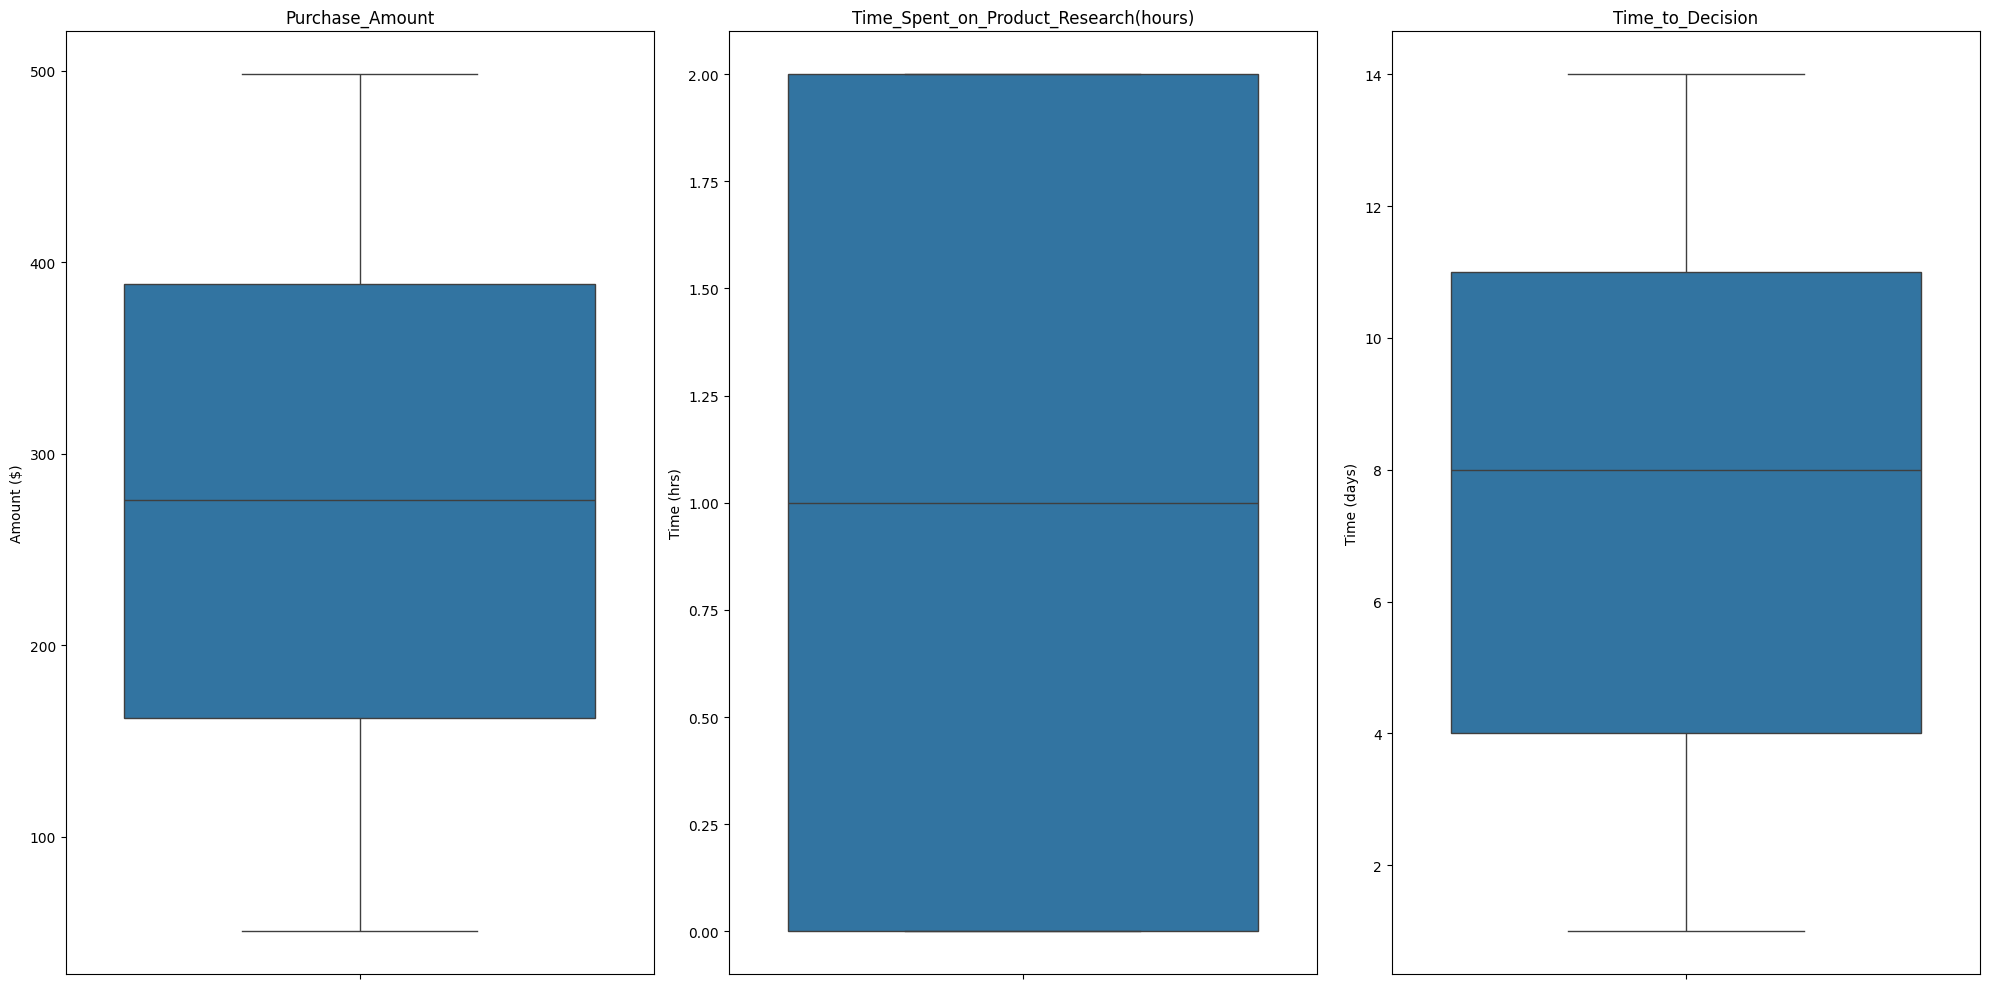

In [9]:
# Handle outliers
def plot_boxplot(df):
  plt.figure(figsize=(20,10))

  # Plot 1: Purchase Amount
  plt.subplot(1, 3, 1)
  sns.boxplot(data=df["Purchase_Amount"], flierprops={'markerfacecolor': 'red'})
  plt.title("Purchase_Amount")
  plt.ylabel("Amount ($)")

  # Plot 2: Time Spent on Product Research
  plt.subplot(1, 3, 2)
  sns.boxplot(data=df["Time_Spent_on_Product_Research(hours)"], flierprops={'markerfacecolor': 'red'})
  plt.title("Time_Spent_on_Product_Research(hours)")
  plt.ylabel("Time (hrs)")

  # Plot 3: Time to Decision
  plt.subplot(1, 3, 3)
  sns.boxplot(data=df["Time_to_Decision"], flierprops={'markerfacecolor': 'red'})
  plt.title("Time_to_Decision")
  plt.ylabel("Time (days)")

  plt.tight_layout()
  plt.show()

plot_boxplot(clean_df)

Graph 2 seems wrong, so here is another graph to explain it. People like to give 1 - 2 hours answer instead of some fraction. 

In [10]:
print(f"Unique value in {'Time_Spent_on_Product_Research(hours)'}:", clean_df['Time_Spent_on_Product_Research(hours)'].unique())

Unique value in Time_Spent_on_Product_Research(hours): [2.   0.3  1.   0.   0.5  0.7  0.25 0.2  1.2  1.3  1.5  0.33]


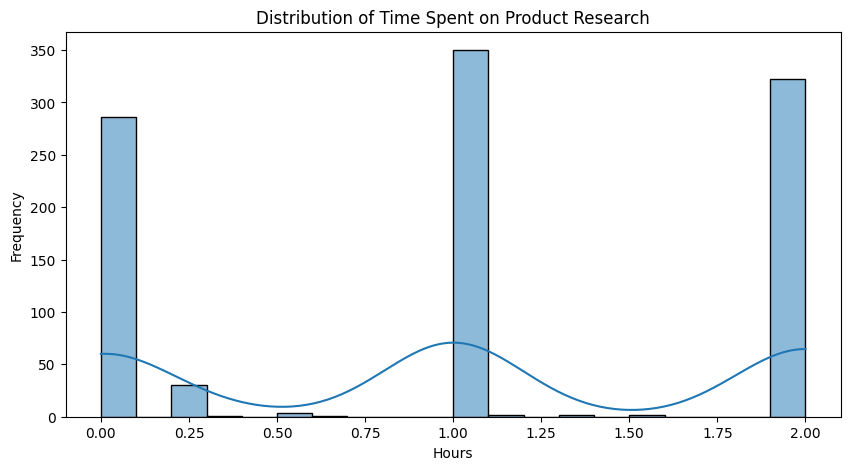

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(clean_df["Time_Spent_on_Product_Research(hours)"], bins=20, kde=True)
plt.title("Distribution of Time Spent on Product Research")
plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.show()